In [1]:
EXPERIMENT_NOTEBOOK_PATH = "../../reports/experiments/2019-02-04_09-44/notebook.csv"


In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [3]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,mean_late_val_acc,epoch
0,0.115,2.295,0.096,2.357,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,1
1,0.166,2.240,0.255,2.117,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,2
2,0.209,2.143,0.297,1.957,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,3
3,0.268,2.054,0.332,1.895,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,4
4,0.280,1.982,0.317,1.887,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,5


## Preprocess

### correct name of reward

In [4]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward,epoch
0,0.115,2.295,0.096,2.357,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,1
1,0.166,2.240,0.255,2.117,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,2
2,0.209,2.143,0.297,1.957,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,3
3,0.268,2.054,0.332,1.895,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,4
4,0.280,1.982,0.317,1.887,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,5


### add epoch info and accuracy overfit

In [5]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())
exp_df["epoch"] = exp_df.index % n_epochs
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]
exp_df.head()

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward,epoch,acc_overfit
0,0.115,2.295,0.096,2.357,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,0.0,0.019
1,0.166,2.240,0.255,2.117,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,1.0,-0.089
2,0.209,2.143,0.297,1.957,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,2.0,-0.088
3,0.268,2.054,0.332,1.895,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,3.0,-0.064
4,0.280,1.982,0.317,1.887,1,dropout,0.844,invert,0.847,dropout,0.384,0.298,1,0.489,4.0,-0.037


## Some info

In [6]:
print (f"number of trials:{exp_df.trial_no.unique().__len__()}")
print (f"number of samples for each trial:{exp_df.sample_no.unique().__len__()}")

number of trials:140
number of samples for each trial:3


In [7]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*30

def plot_exp_lines(exp_df):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        ############################################################
        # Accuracy plot
        ############################################################
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,51,1)
            axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
            axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)
            
        axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                  "(each color represents a distinct augmentation strategy) ", fontsize=20)
        axes[0].set_ylabel("accuracy", fontsize=20)
        
        ############################################################
        # Loss plot
        ############################################################
        for sample_id in iter_df["sample_no"].unique():
            sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
            xs = np.arange(1,51,1)
            axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
            axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)
            
        #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
        #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
        axes[1].set_xlabel("epochs", fontsize=20)
        axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        param5 = iter_df["aug3_type"].values[0]
        param6 = iter_df["aug3_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,param5,param6,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","aug3_type","aug3_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 140


,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
130,131,gamma-contrast,0.058,gaussian-blur,0.205,dropout,0.516,0.527,0.568
48,49,dropout,0.198,invert,0.240,sharpen,0.409,0.465,0.550
136,137,brighten,0.017,gaussian-blur,0.231,crop,0.954,0.406,0.545
114,115,dropout,0.657,gamma-contrast,0.102,sharpen,0.537,0.417,0.544
11,12,translate-y,0.481,gamma-contrast,0.880,fog,0.217,0.565,0.540
10,11,fog,0.510,crop,0.451,crop,0.442,0.980,0.522
71,72,emboss,0.980,sharpen,0.028,sharpen,0.154,0.472,0.520
59,60,invert,0.396,additive-gaussian-noise,0.605,sharpen,0.476,0.782,0.520
84,85,translate-y,0.409,gamma-contrast,0.154,sharpen,0.290,0.477,0.516
20,21,gamma-contrast,0.797,dropout,0.236,translate-x,0.633,0.510,0.509


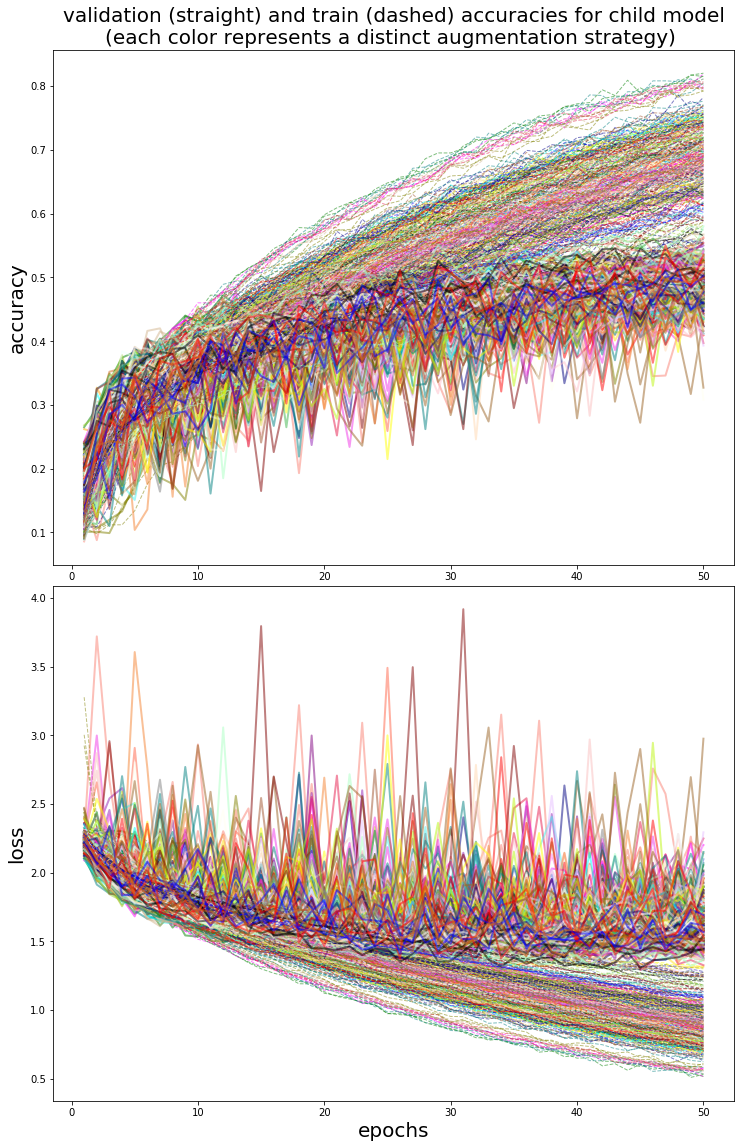

In [8]:
score_df = plot_exp_lines(exp_df)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards trend

/Users/baris.ozmen/miniconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


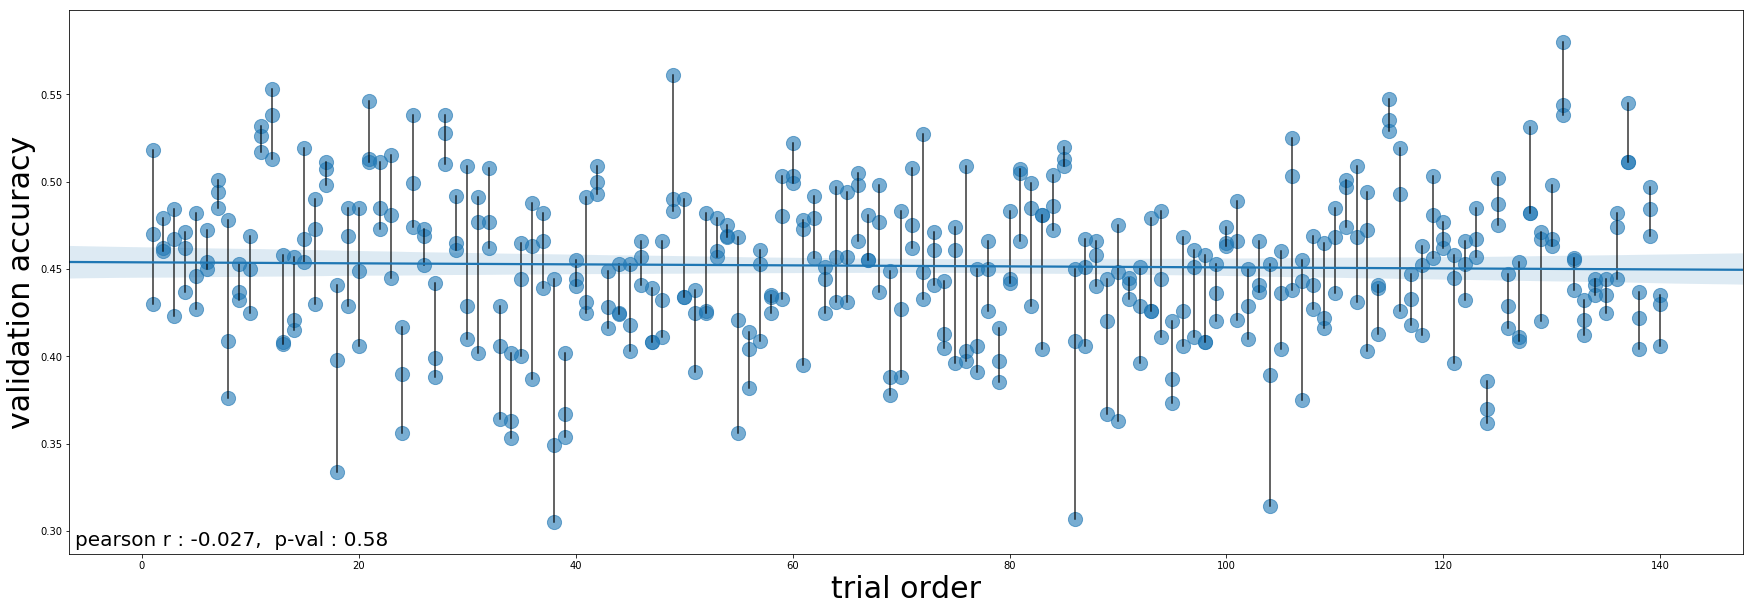

In [9]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

## How frequency of augmented images affect accuracy?

Text(0, 0.5, 'val_acc')

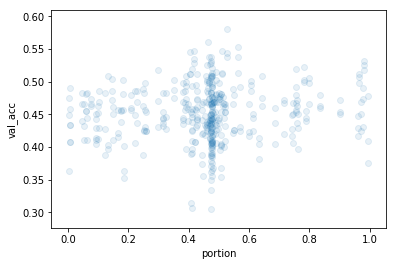

In [10]:
df = (exp_df[exp_df["acc_overfit"]<0.05]
         .sort_values("val_acc", ascending=False)
         .drop_duplicates(["trial_no","sample_no"])
     )[["portion","val_acc"]]

plt.scatter(df["portion"], df["val_acc"], alpha=0.1)
plt.xlabel("portion")
plt.ylabel("val_acc")

In [11]:
exp_df.drop_duplicates("trial_no")["portion"].unique().__len__()

109

# Top 5 policy accuracy curves (they're overfitting for augmentation)

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
3,131,gamma-contrast,0.058,gaussian-blur,0.205,dropout,0.516,0.527,0.568
1,49,dropout,0.198,invert,0.240,sharpen,0.409,0.465,0.550
4,137,brighten,0.017,gaussian-blur,0.231,crop,0.954,0.406,0.545
2,115,dropout,0.657,gamma-contrast,0.102,sharpen,0.537,0.417,0.544
0,12,translate-y,0.481,gamma-contrast,0.880,fog,0.217,0.565,0.540


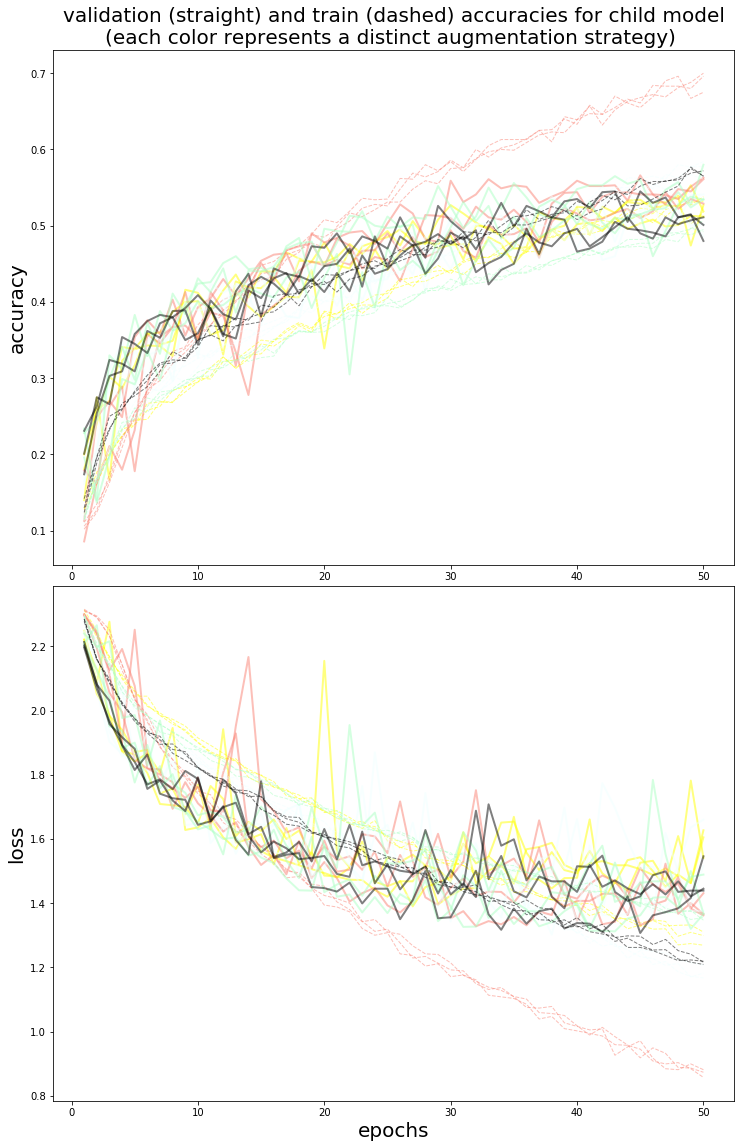

In [12]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
1,39,sharpen,0.915,additive-gaussian-noise,0.159,sharpen,0.482,0.506,0.347
4,124,crop,0.104,additive-gaussian-noise,0.226,dropout,0.510,0.474,0.328
0,34,dropout,0.971,additive-gaussian-noise,0.221,sharpen,0.271,0.185,0.312
2,86,dropout,0.379,additive-gaussian-noise,0.039,sharpen,0.540,0.410,0.282
3,104,dropout,0.570,gaussian-blur,0.234,sharpen,0.414,0.409,0.256


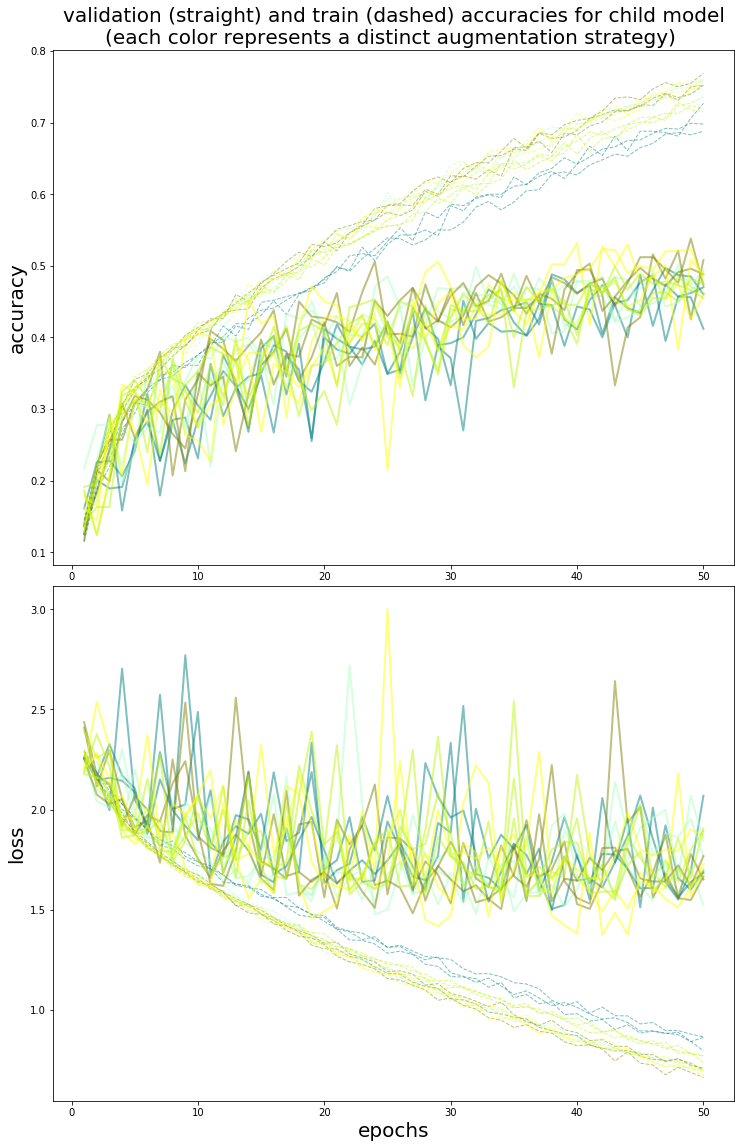

In [13]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

In [14]:
import sys
sys.path.insert(0,"../../")

from deepaugmenter.augmenter import Augmenter
augmenter=Augmenter()

In [15]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugmenter.build_features import DataOp

Using TensorFlow backend.


In [16]:
data, input_shape = DataOp.load("cifar10",1000)
data = DataOp.preprocess(data)

In [17]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         trial_df.iloc[0,9],trial_df.iloc[0,10],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)
    
def display_augmentation_by_steps(trial_no, df, data, nrows=4):
    from deepaugmenter.augmenter import transform
    trial_df = df[df["trial_no"]==trial_no]
    
    hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                   trial_df.iloc[0,7],trial_df.iloc[0,8],
                   trial_df.iloc[0,9],trial_df.iloc[0,10],
                   1.0] # proportion always 1
    
    X = data["X_train"]
    X_aug_1 = transform(hyperparams[0], hyperparams[1], X)
    X_aug_2 = transform(hyperparams[2], hyperparams[3], X_aug_1)
    X_aug_3 = transform(hyperparams[4], hyperparams[5], X_aug_2)
    
    ncols=4
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%4==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug_1[i])
            axes[int((i+2)/ncols)][(i+2)%ncols].imshow(X_aug_2[i])
            axes[int((i+3)/ncols)][(i+3)%ncols].imshow(X_aug_3[i])
            
    fig.suptitle(f"{hyperparams[0]}:{hyperparams[1]:0.2}")

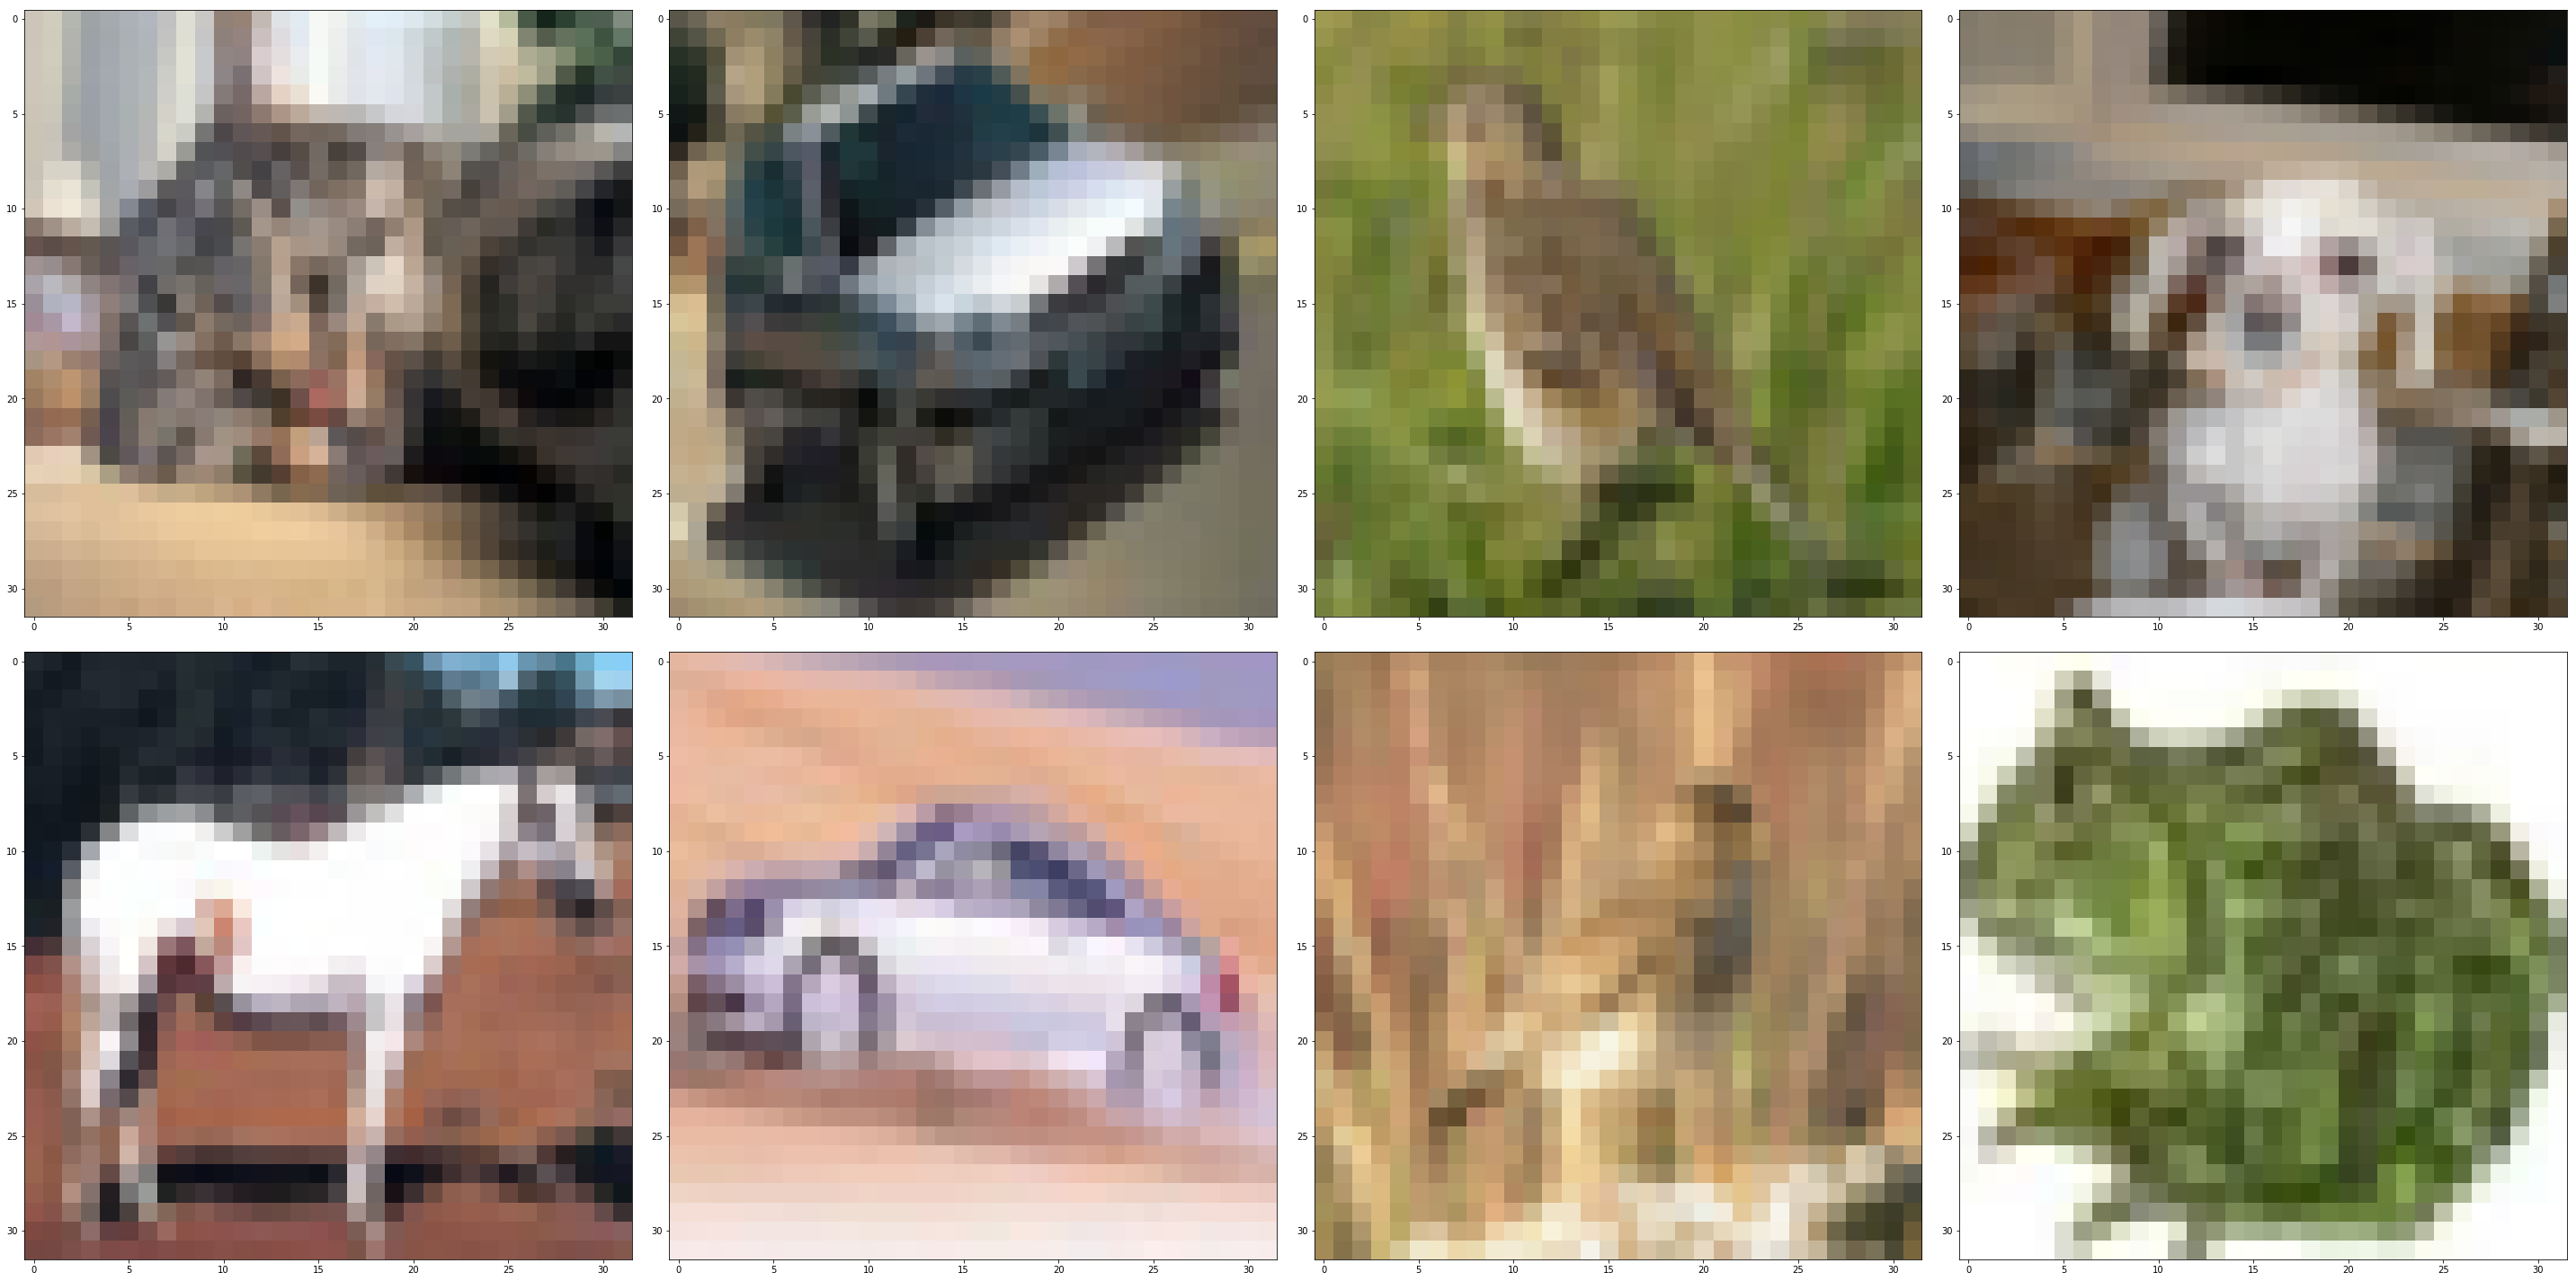

In [18]:
display_images(data["X_train"])

['gaussian-blur', 0.474, 'rotate', 0.737, 'shear', 0.135, 1.0]


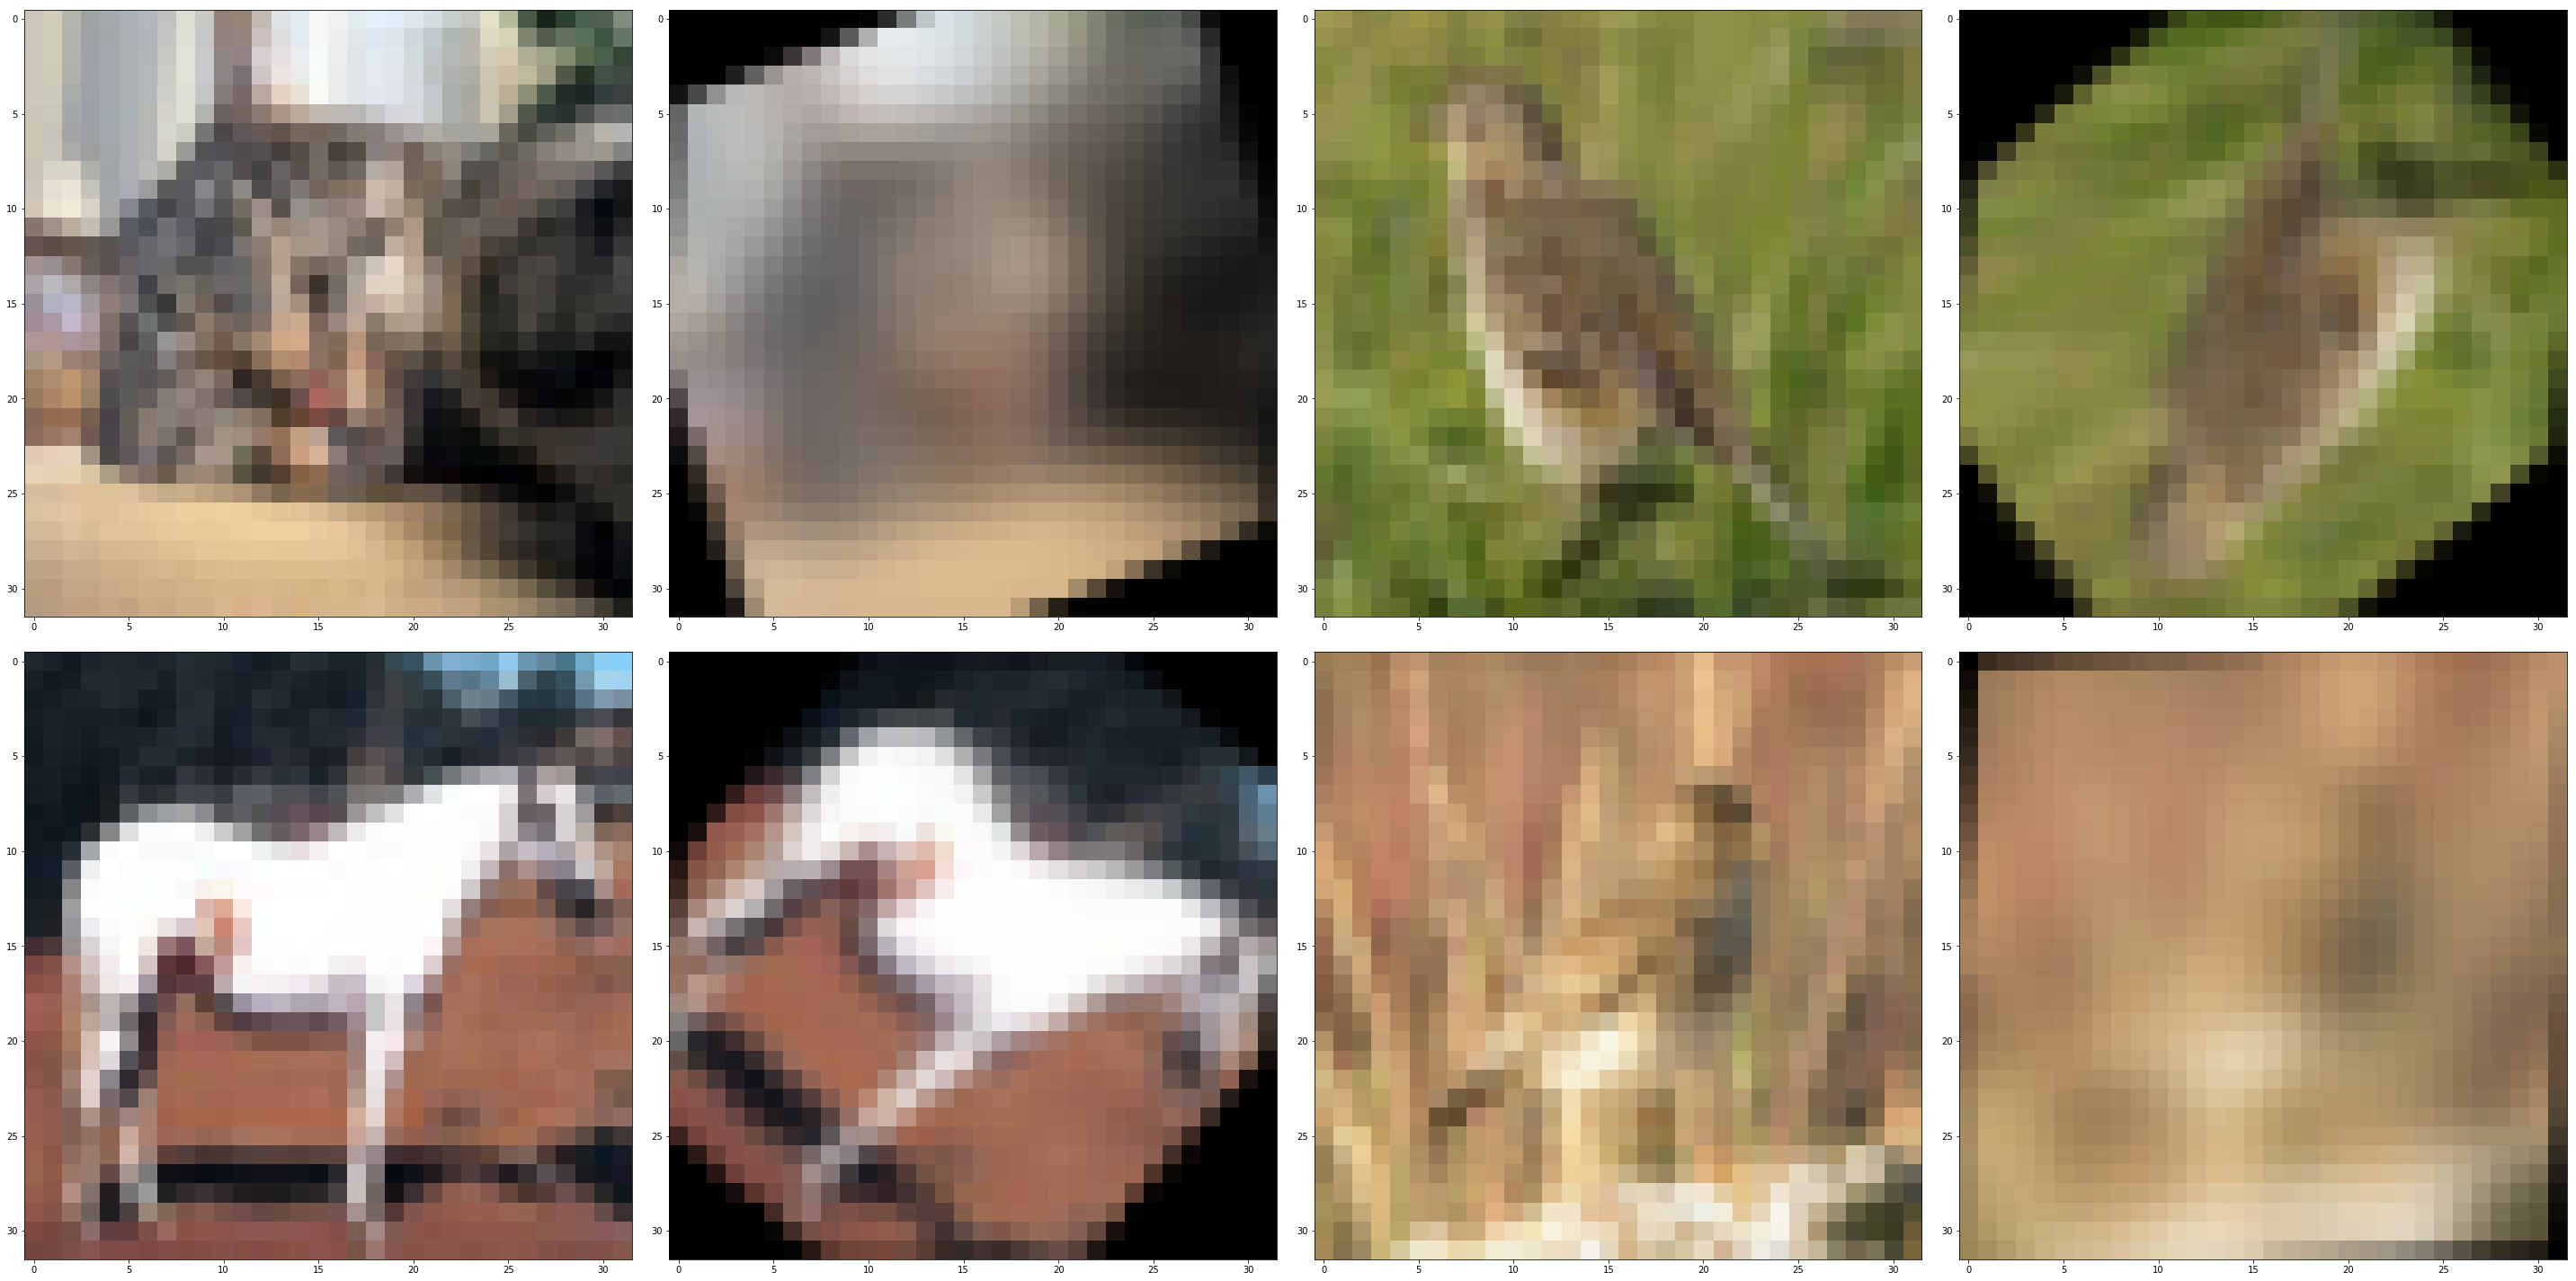

In [19]:
display_augmentation_by_trial_no(5, exp_df, data)

# Overfitting augmentations

131
['gamma-contrast', 0.057999999999999996, 'gaussian-blur', 0.205, 'dropout', 0.516, 1.0]
49
['dropout', 0.198, 'invert', 0.24, 'sharpen', 0.409, 1.0]
137
['brighten', 0.017, 'gaussian-blur', 0.231, 'crop', 0.9540000000000001, 1.0]
115
['dropout', 0.657, 'gamma-contrast', 0.102, 'sharpen', 0.537, 1.0]
12
['translate-y', 0.48100000000000004, 'gamma-contrast', 0.88, 'fog', 0.217, 1.0]


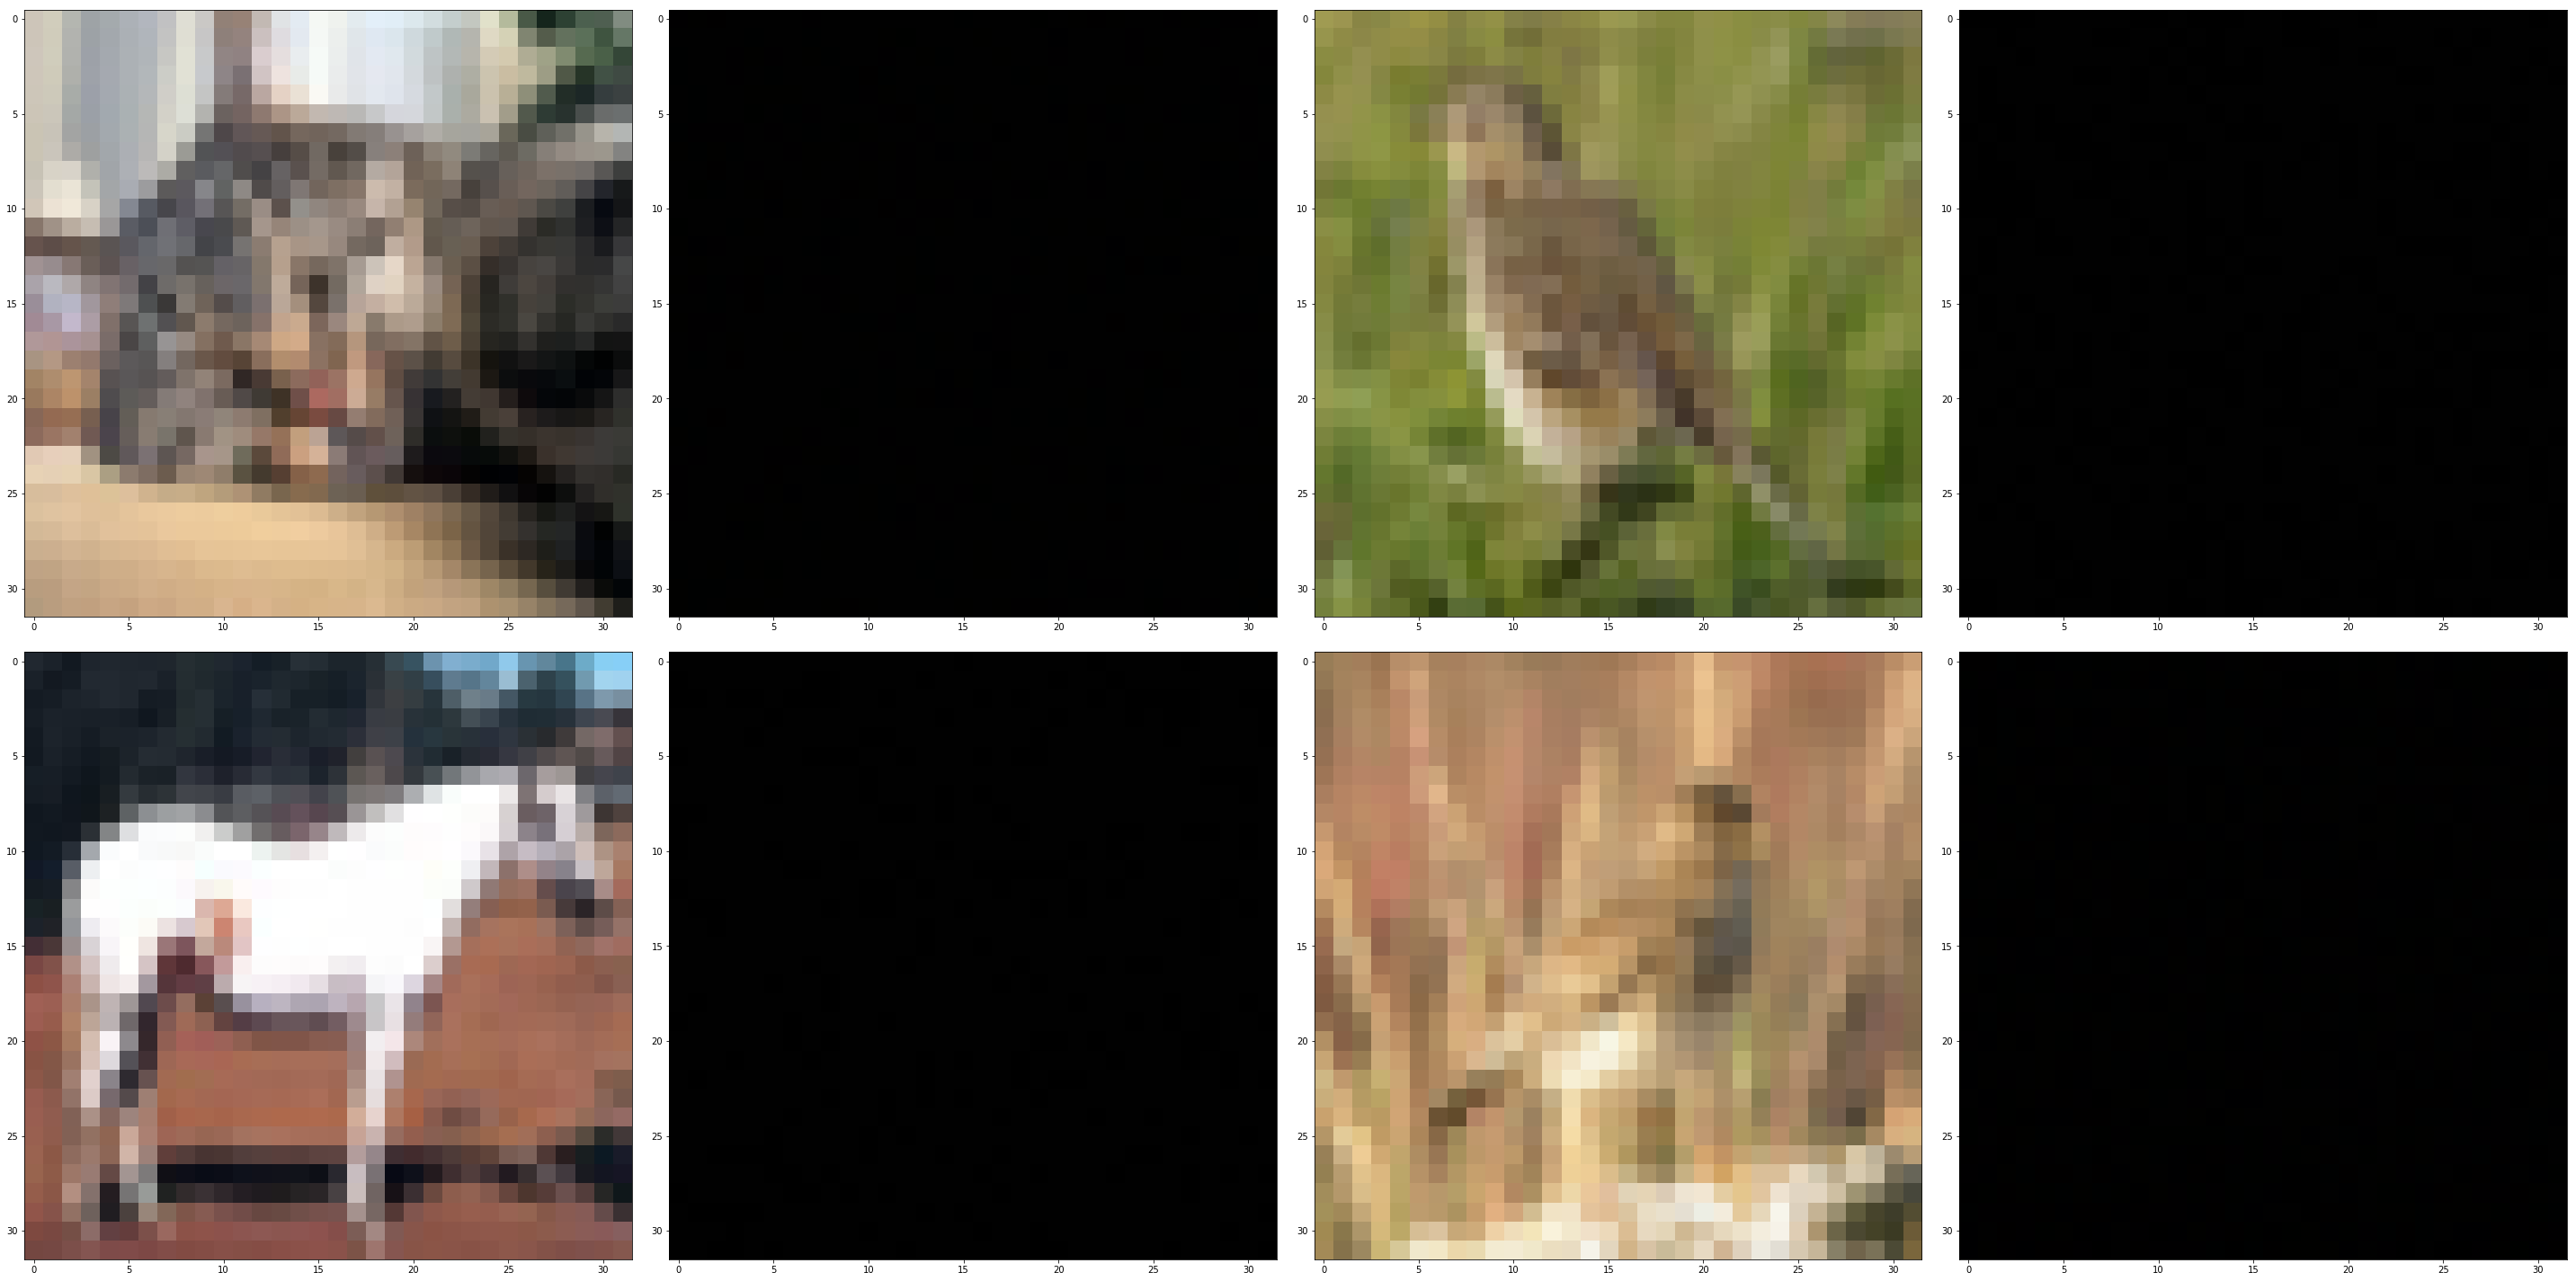

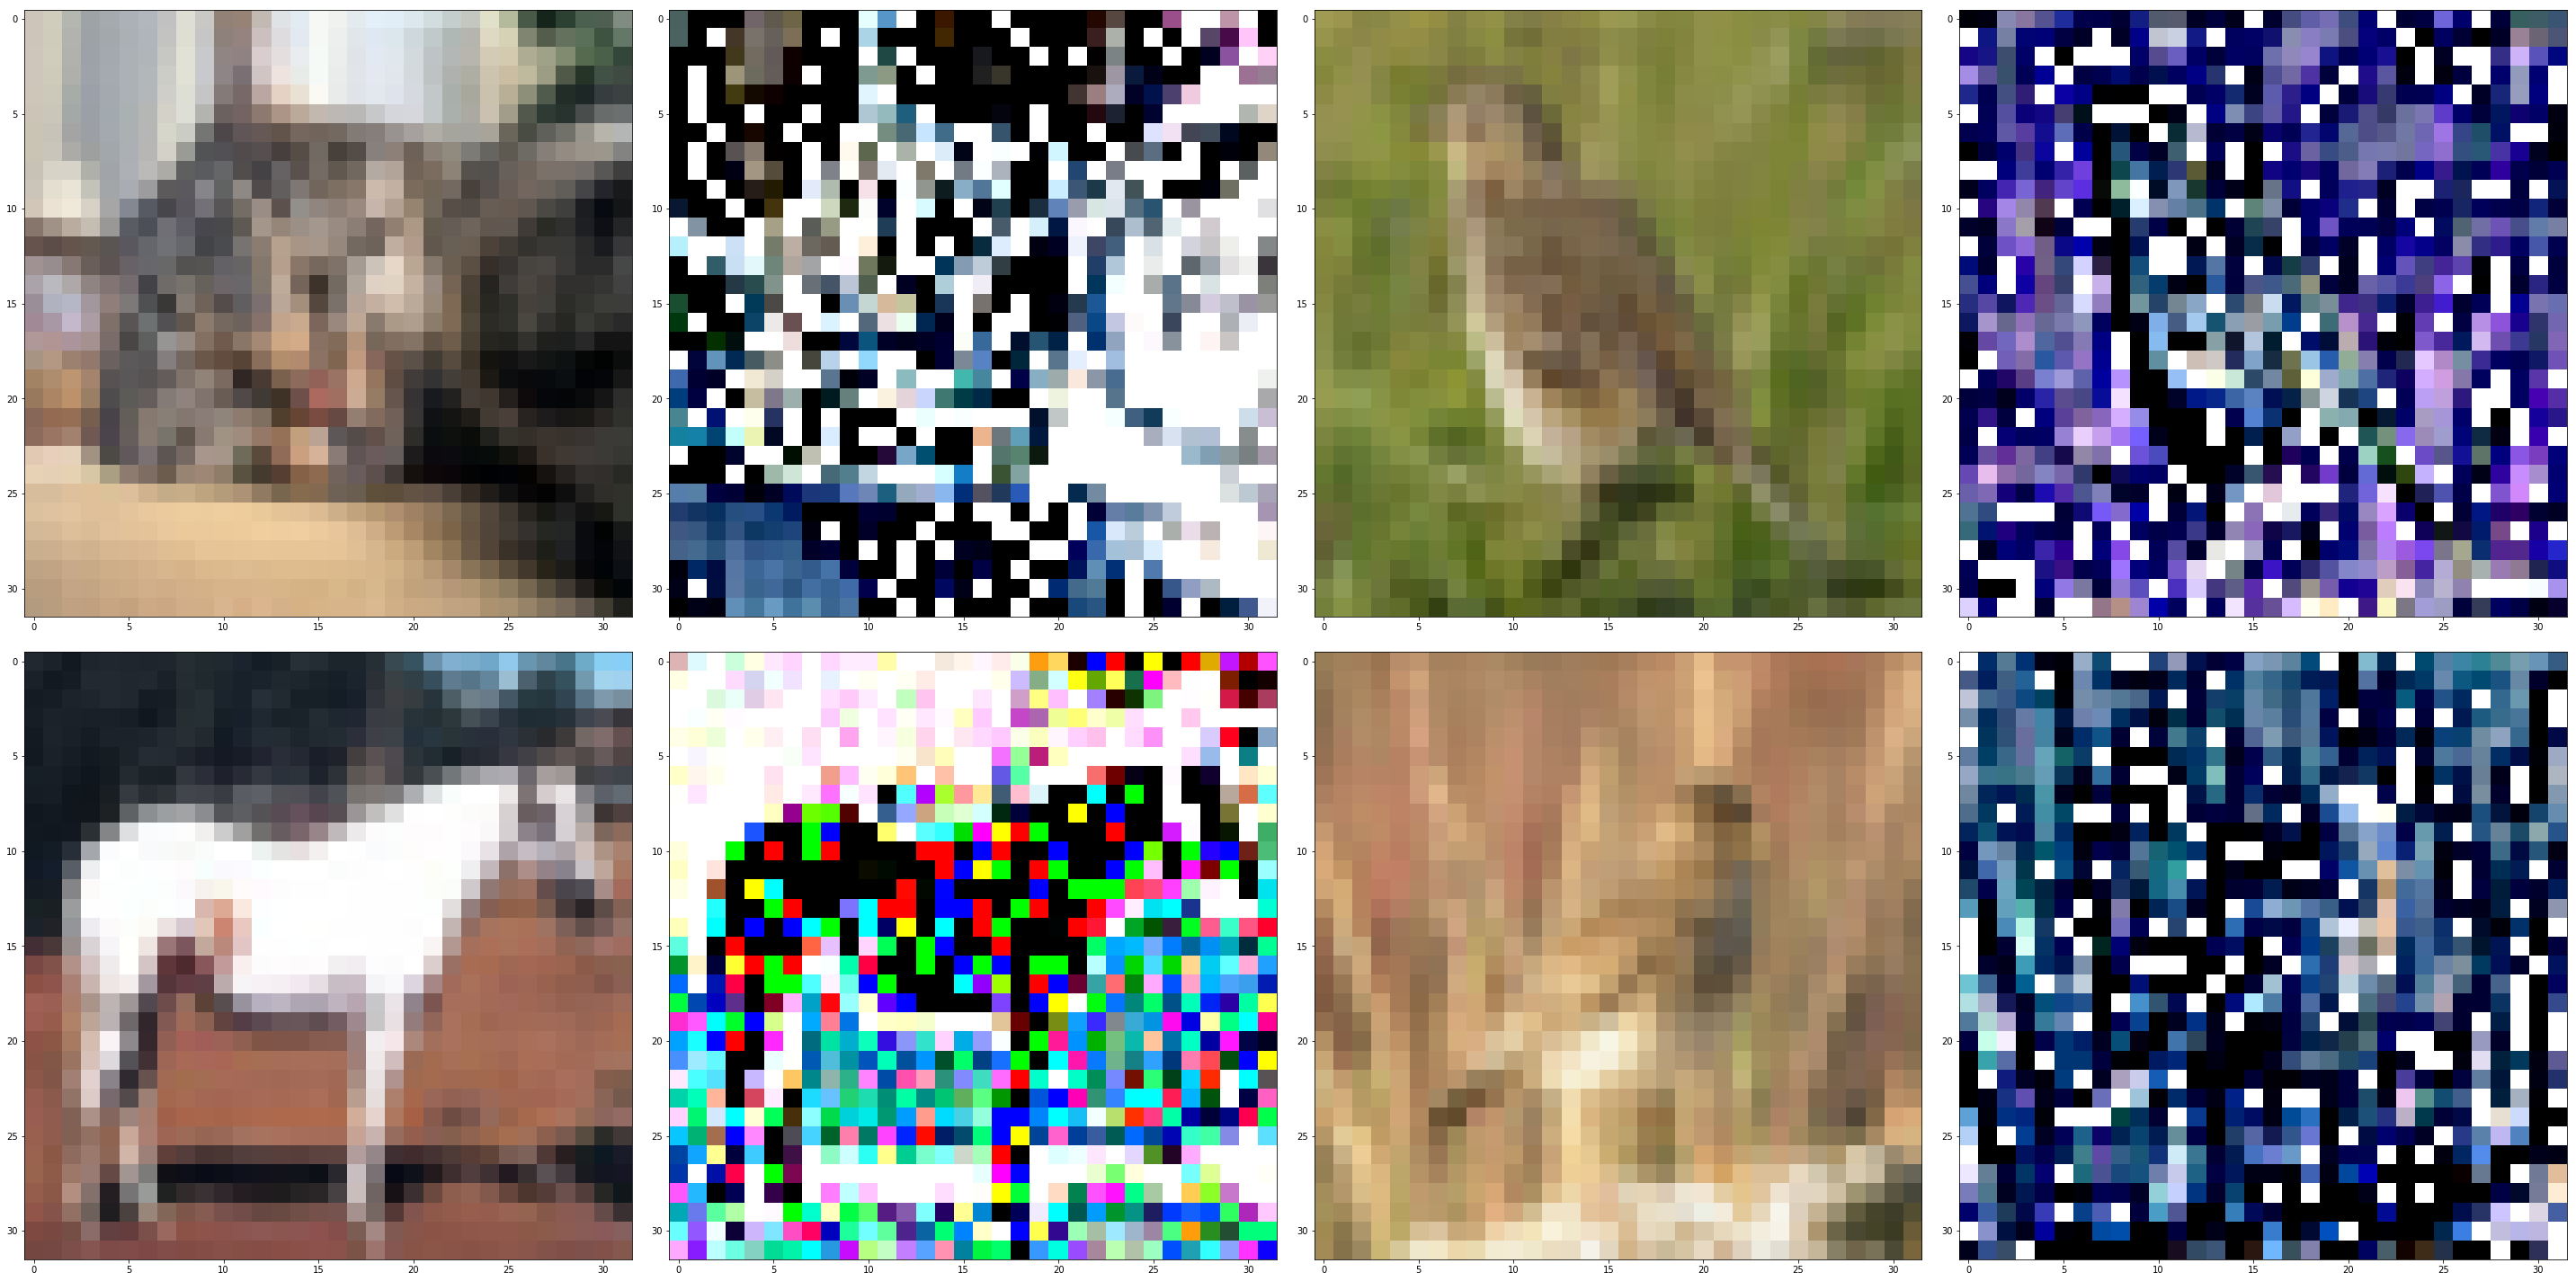

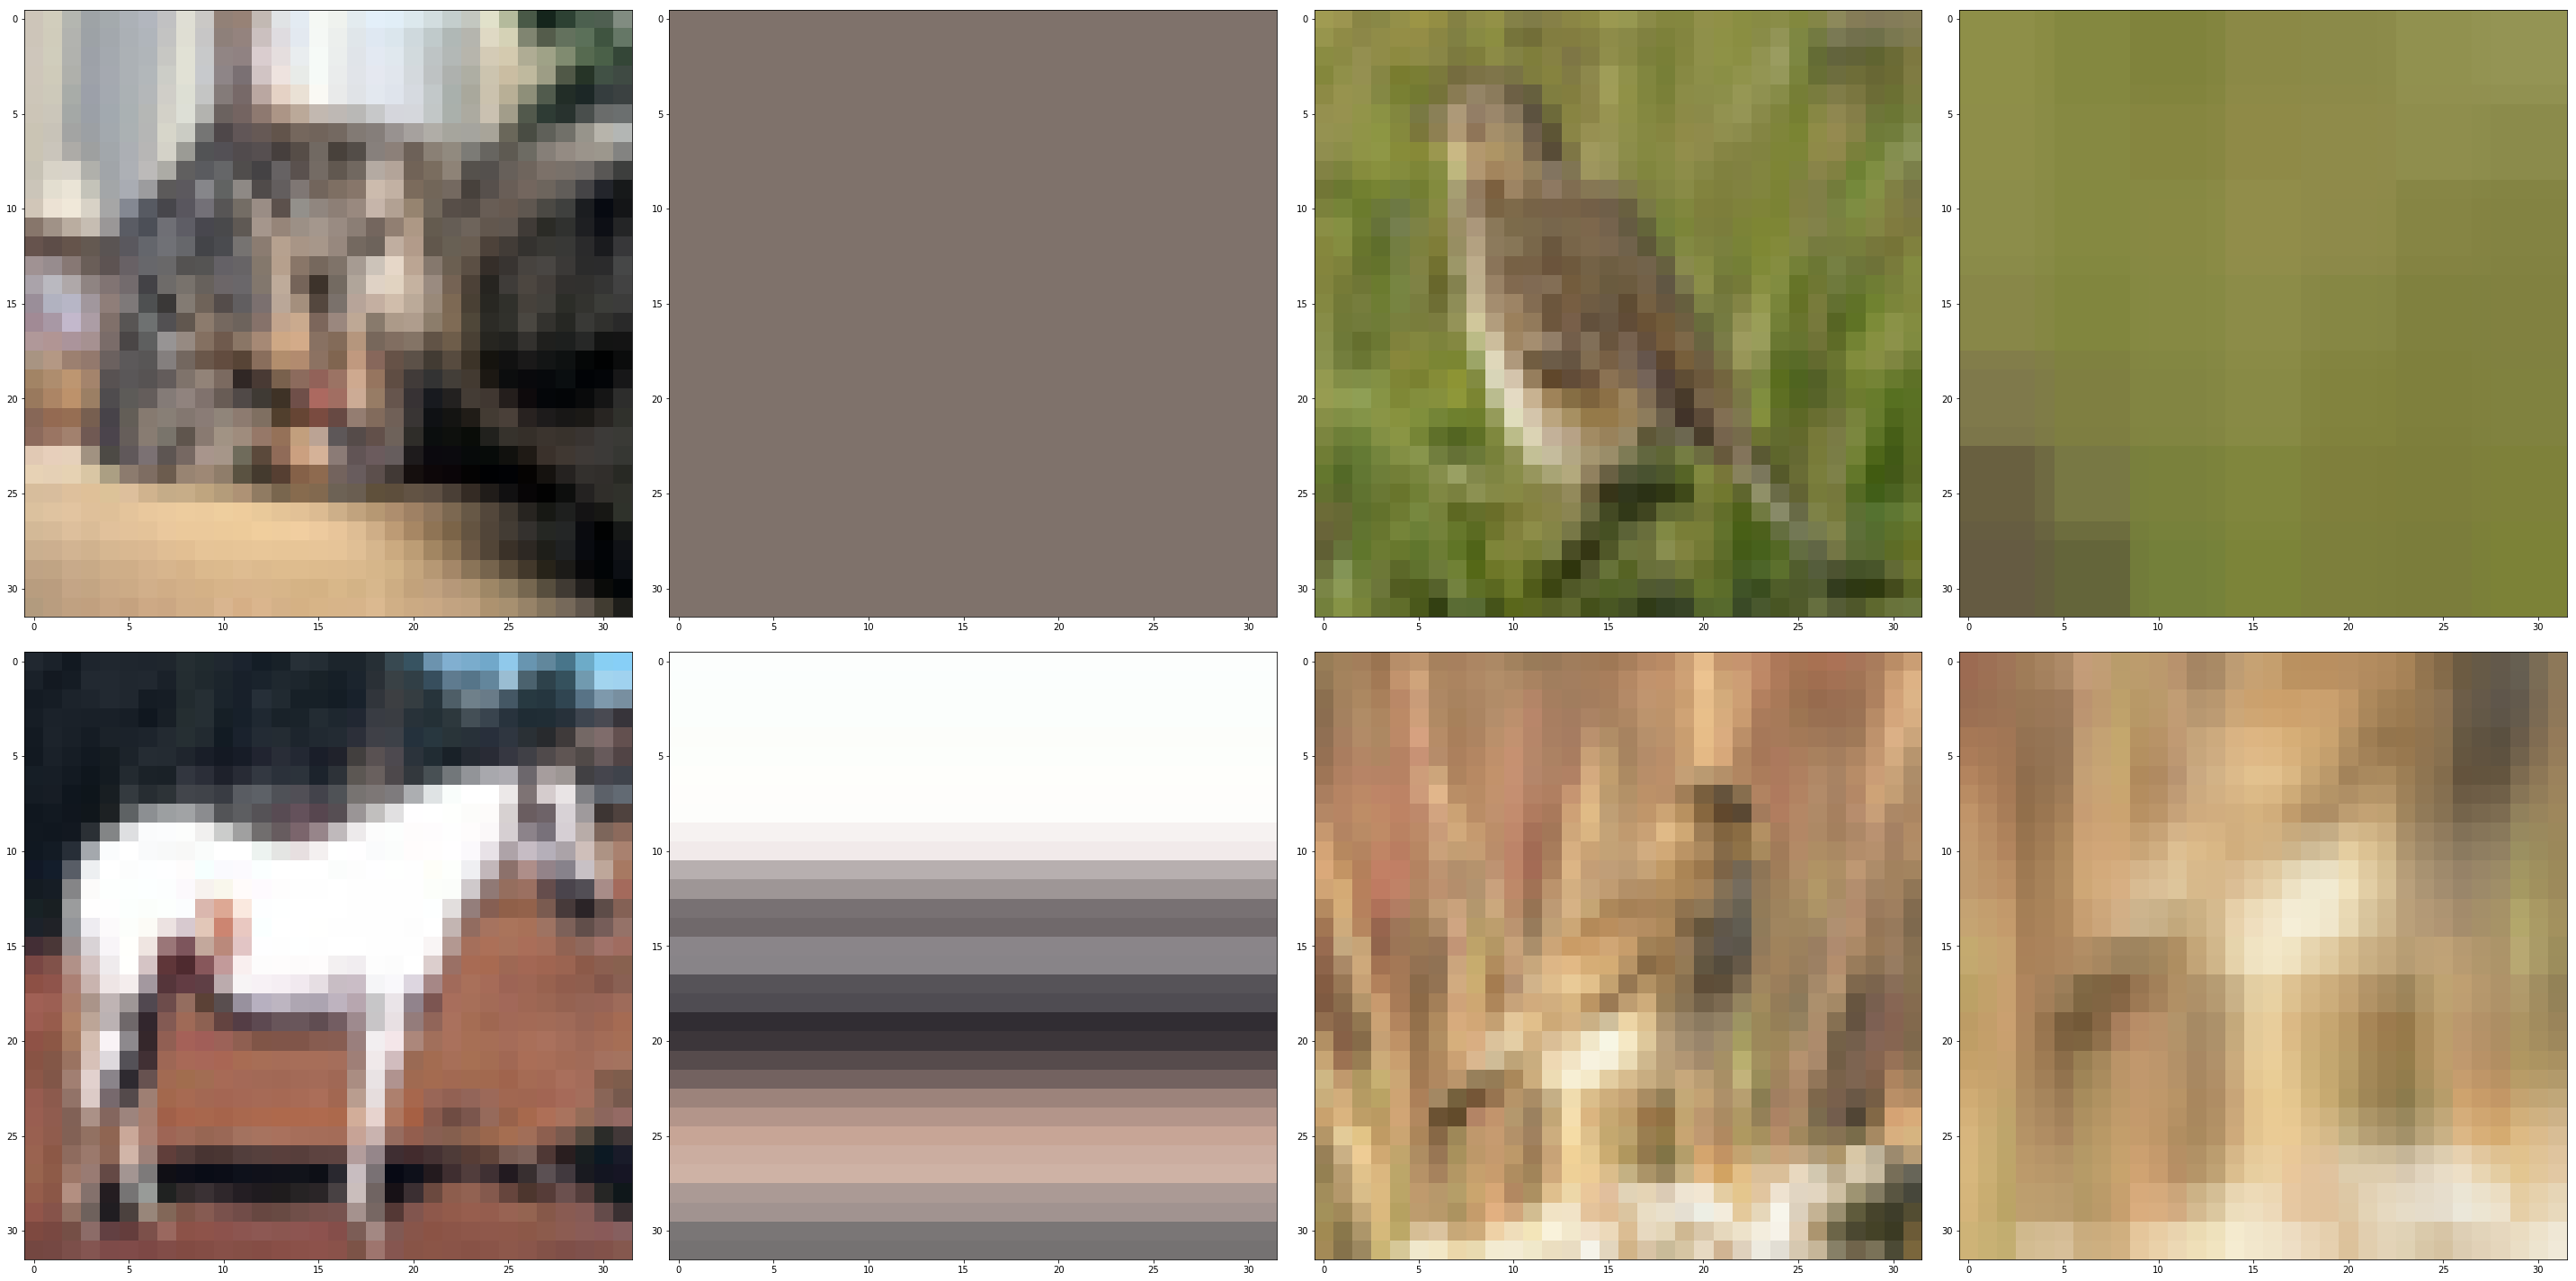

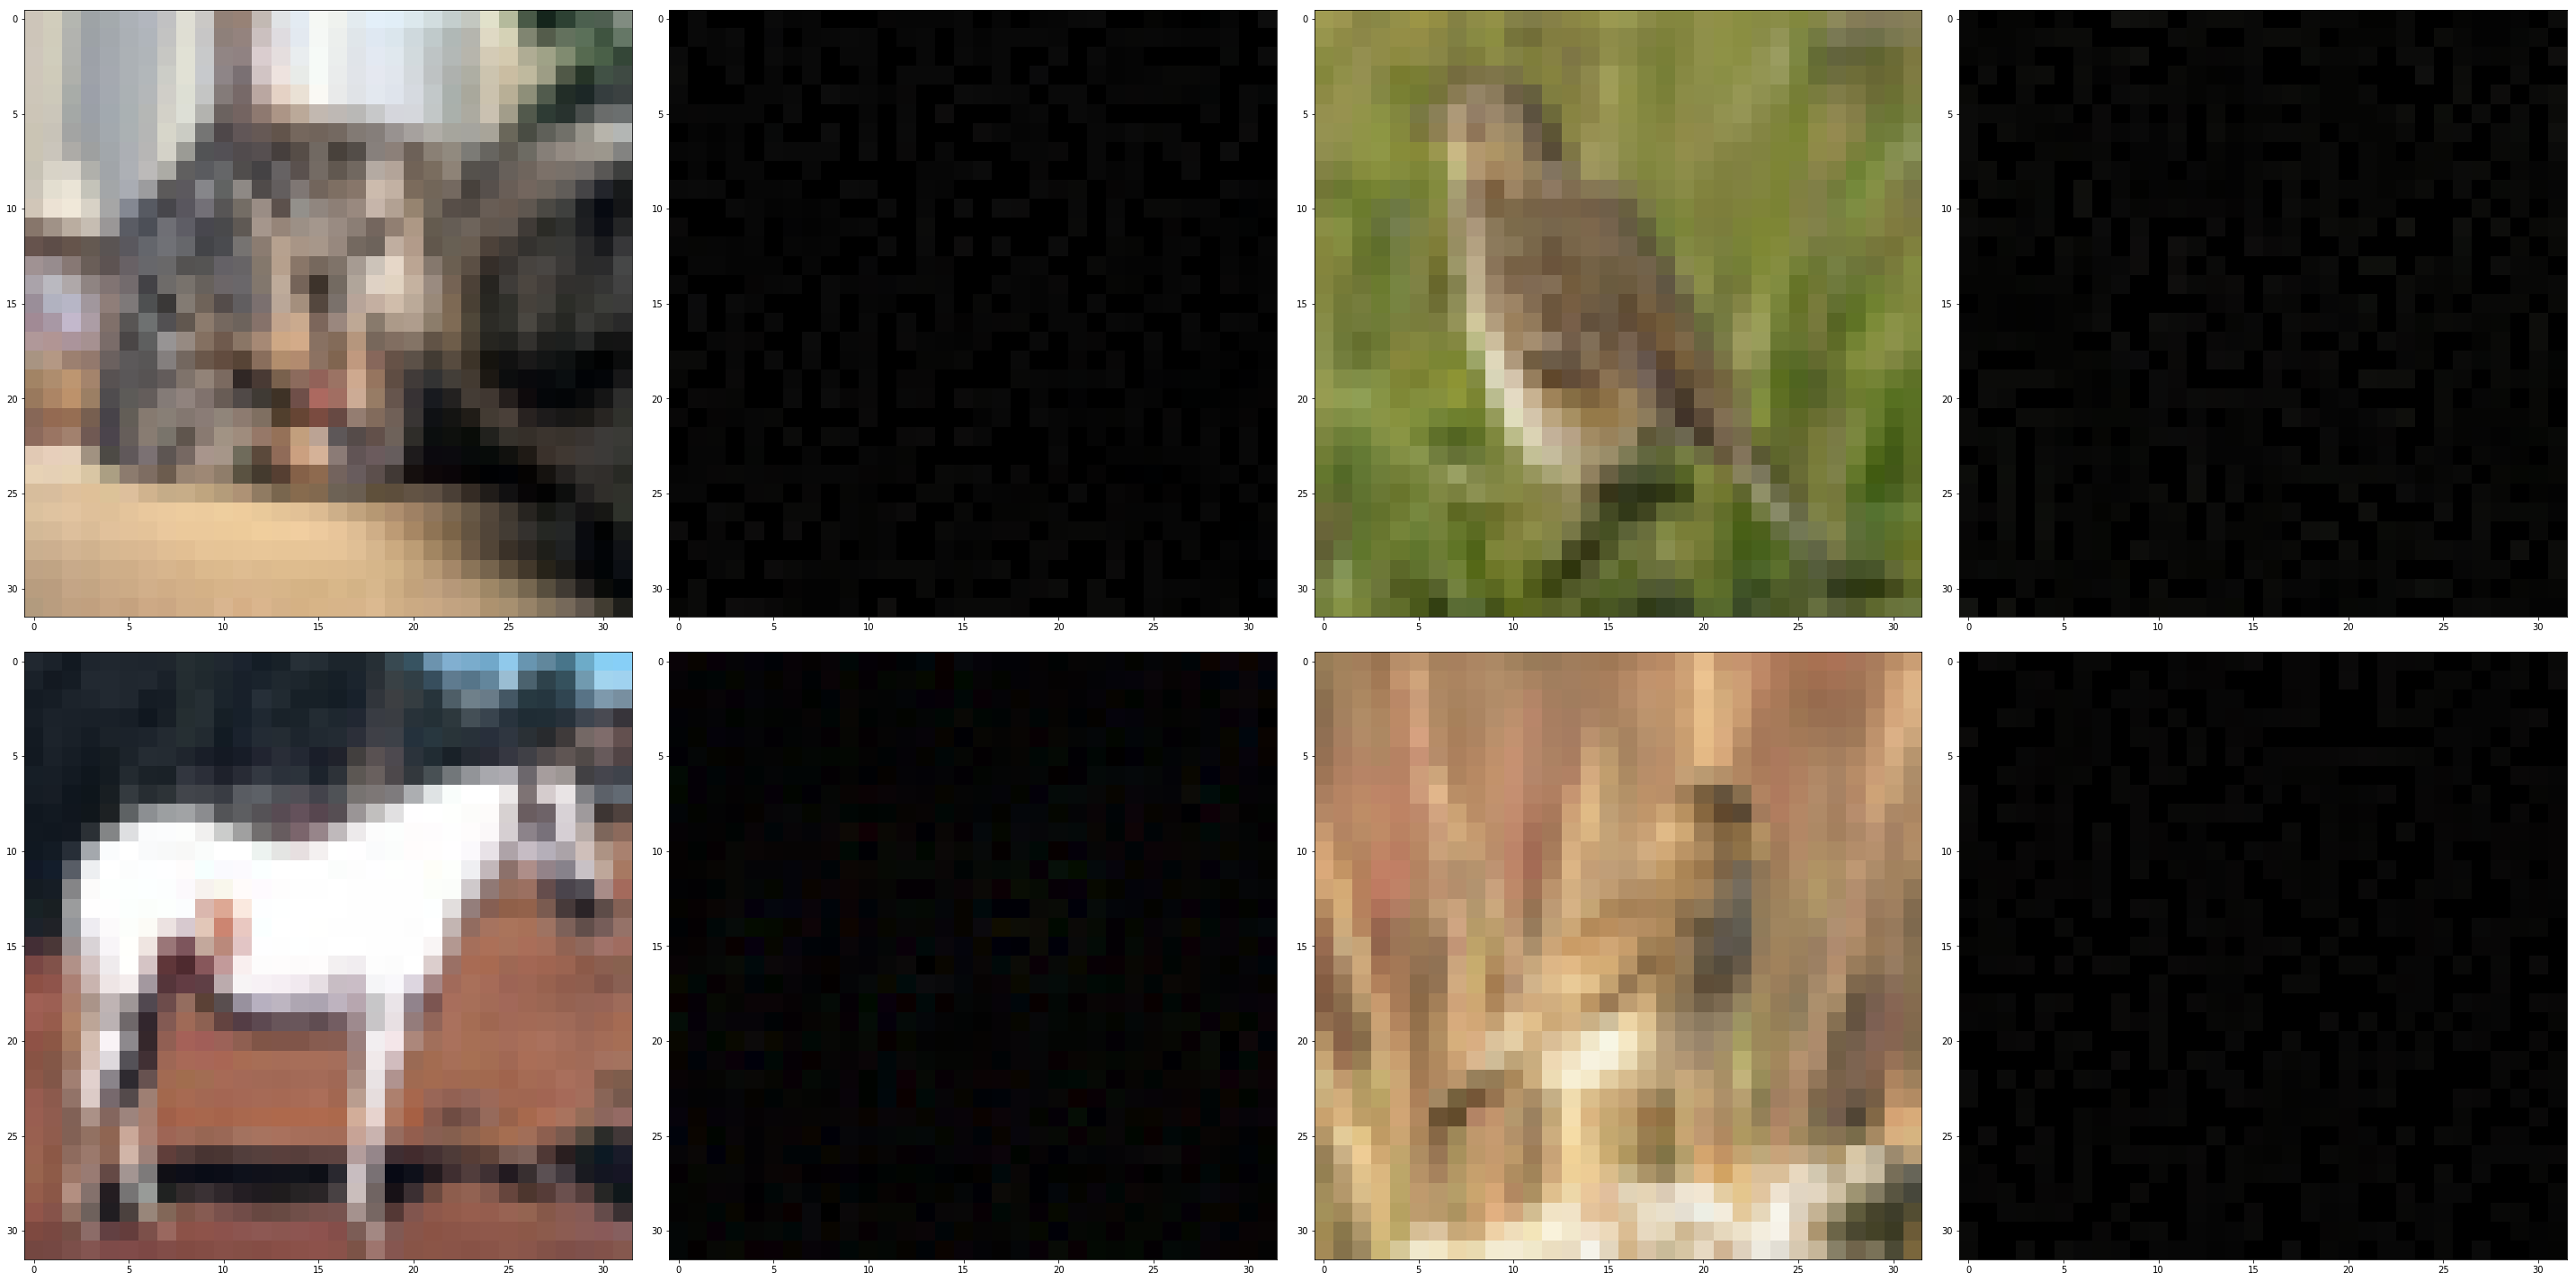

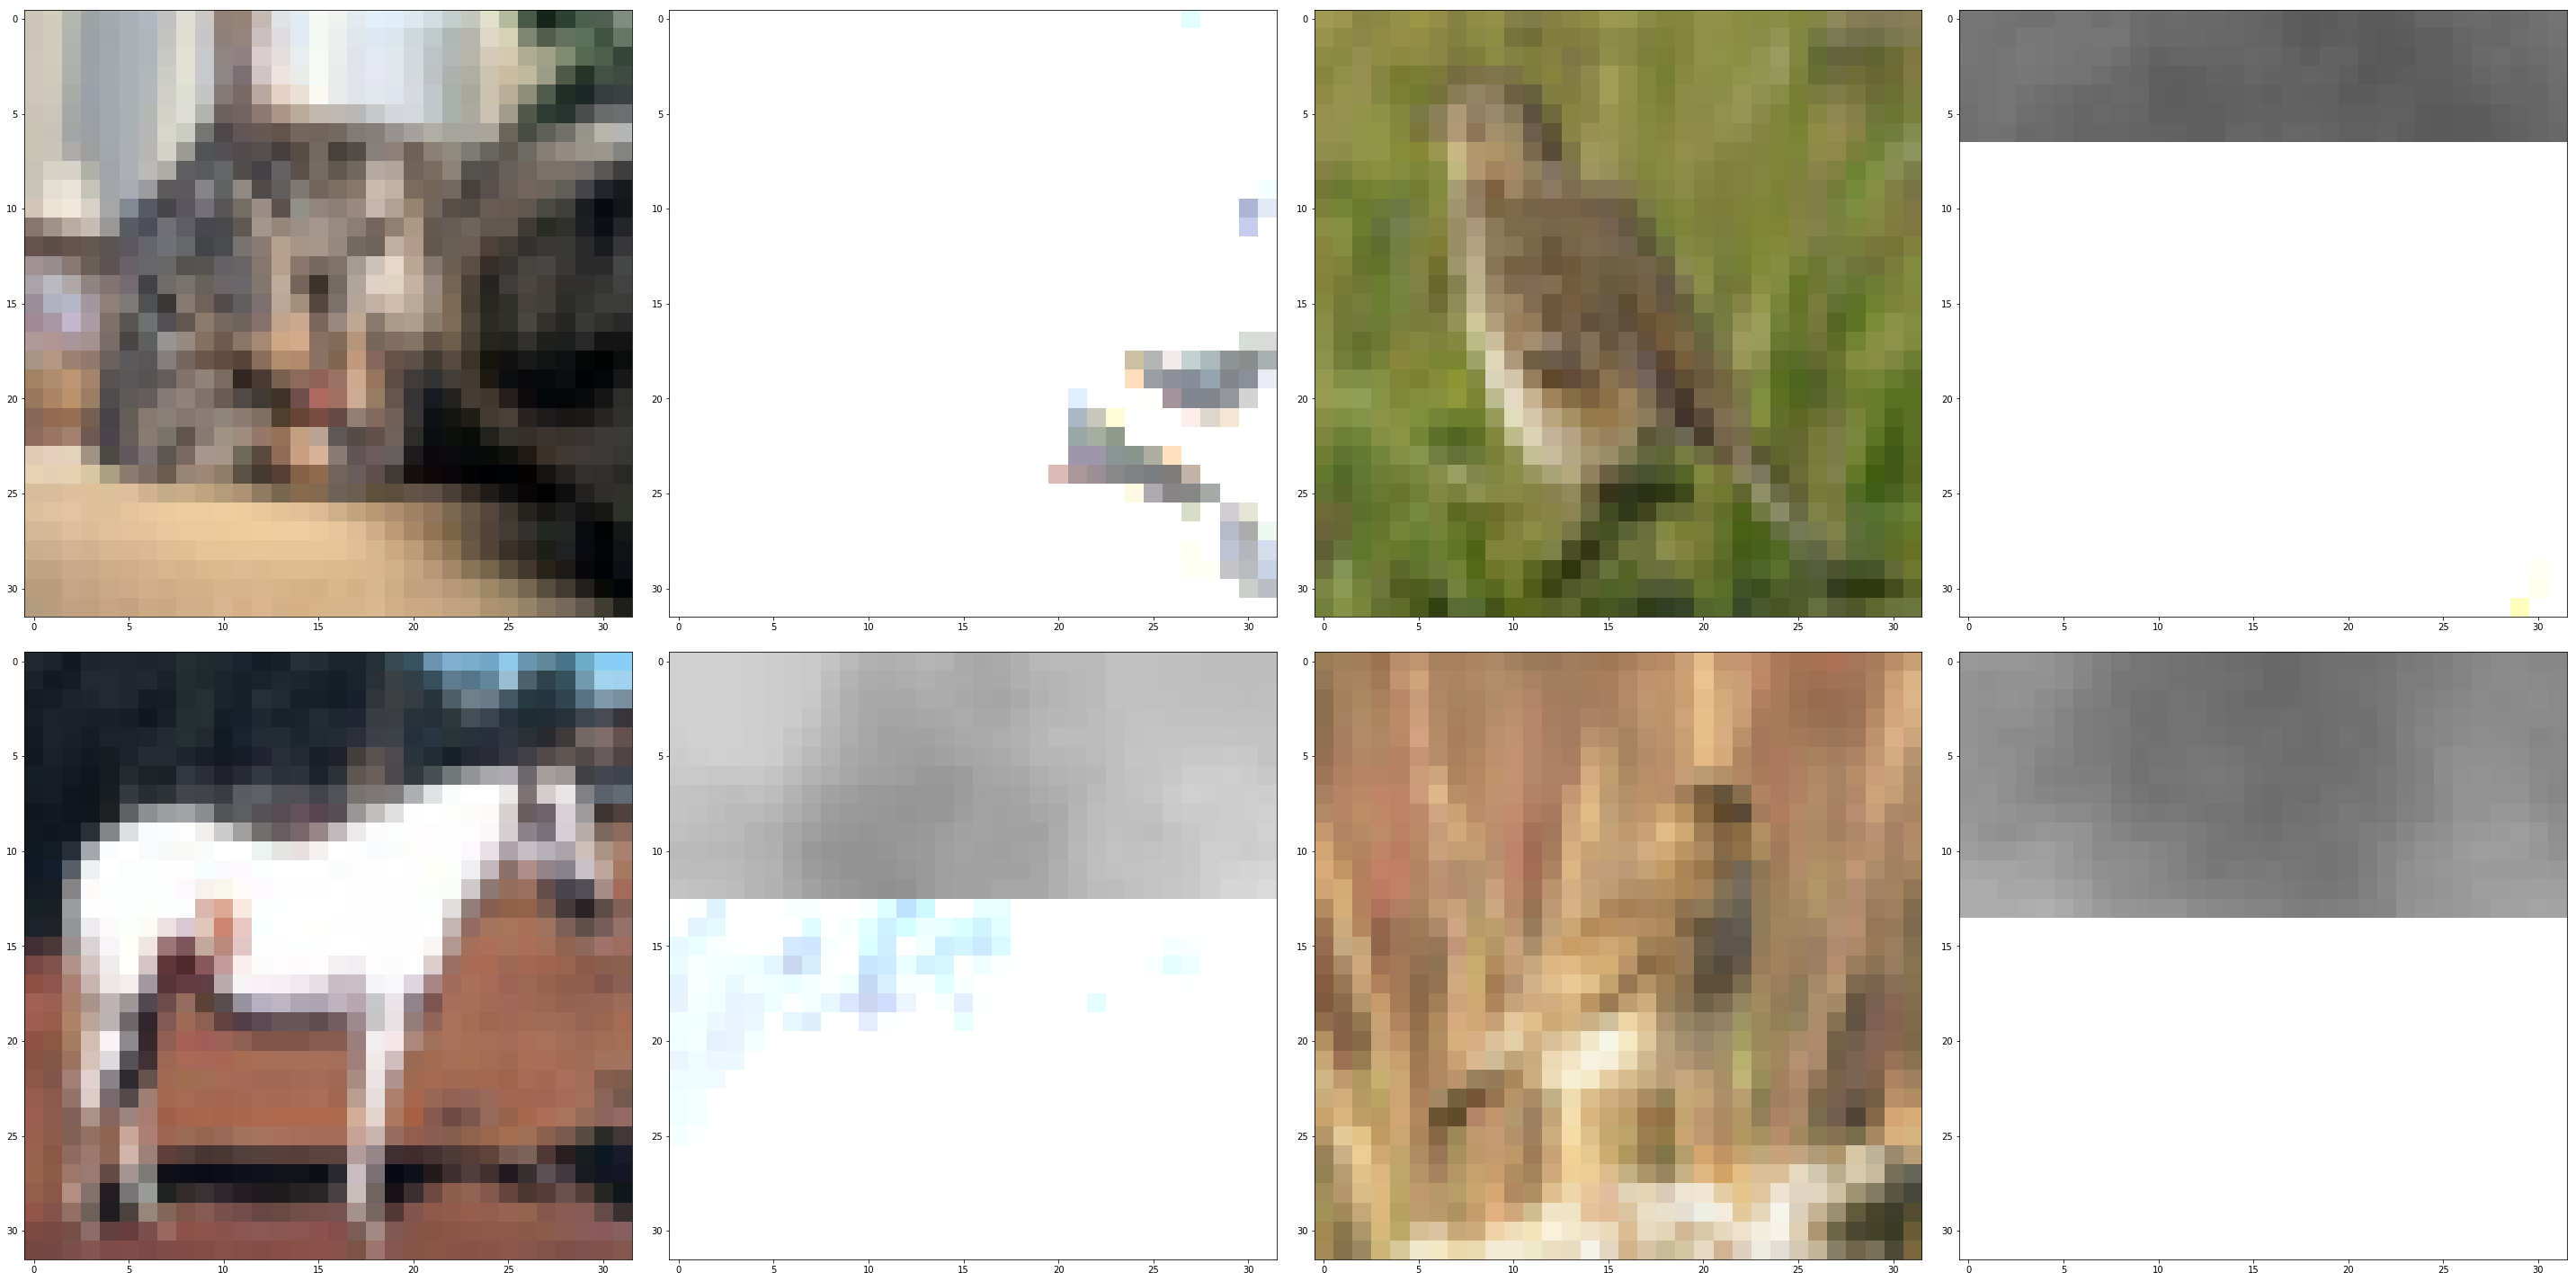

In [20]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [21]:
acc_overfit_by_trial = exp_df[exp_df["epoch"]<35].groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 72


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

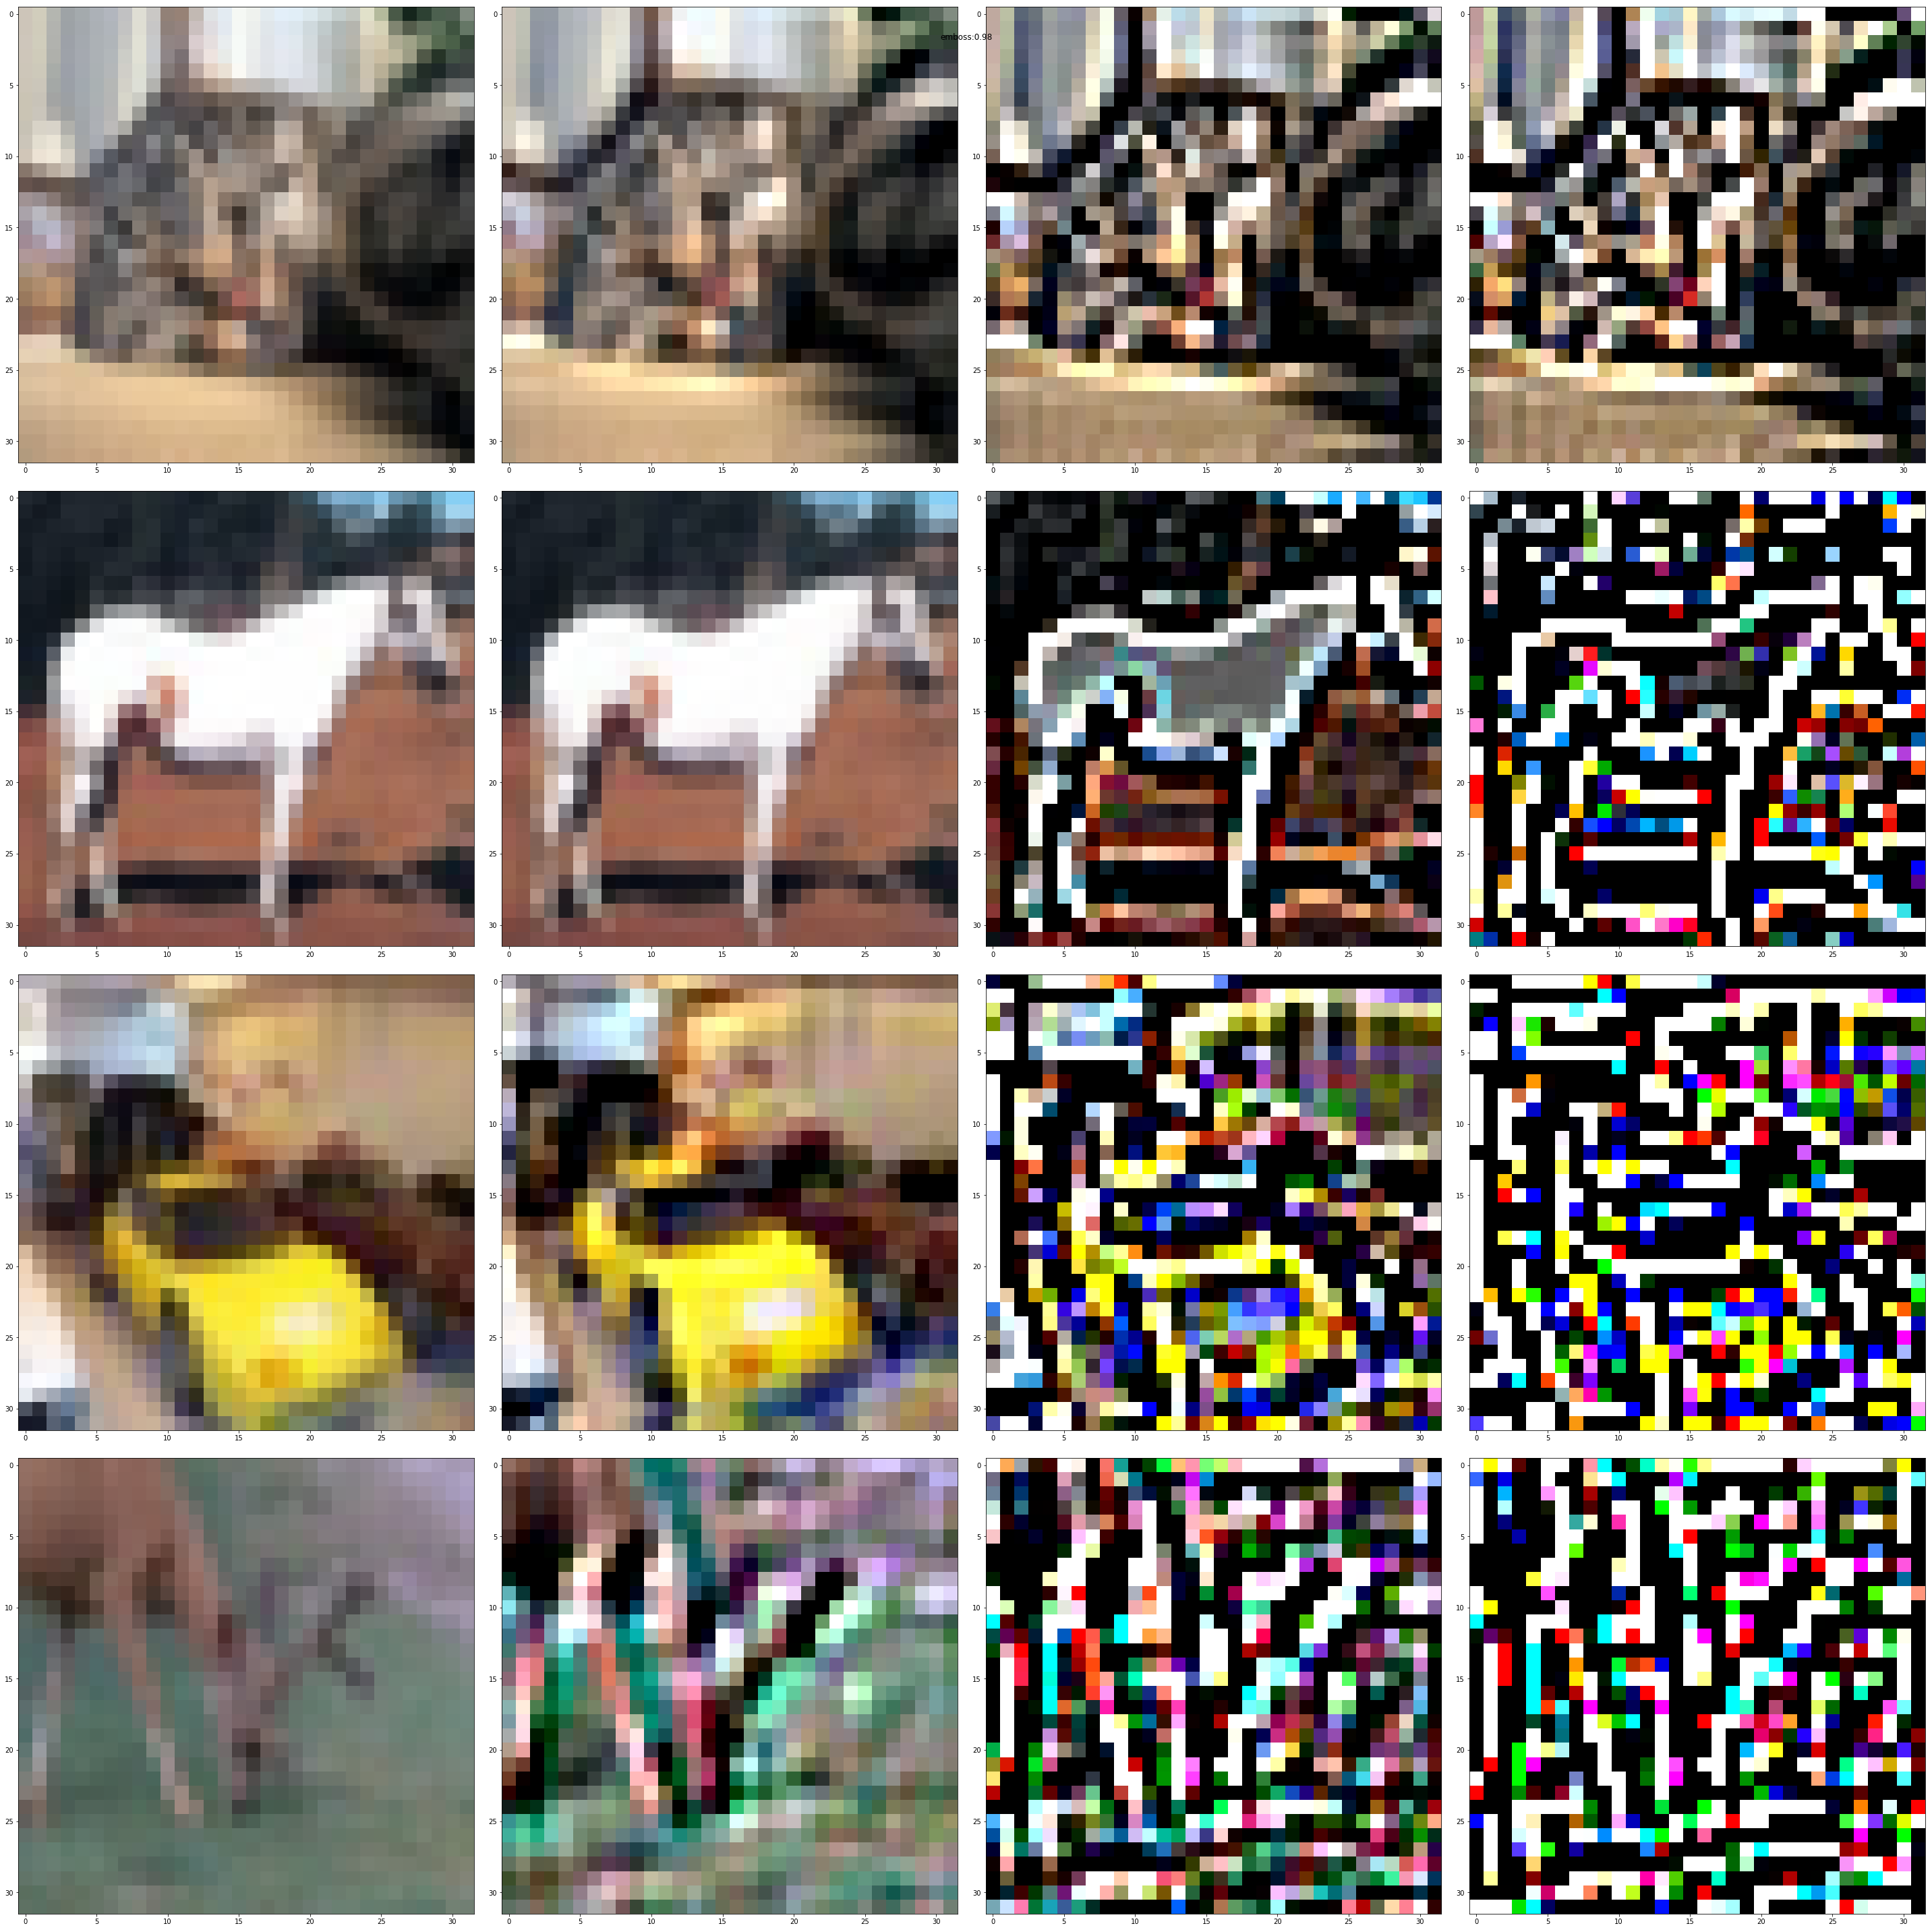

<Figure size 144x144 with 0 Axes>

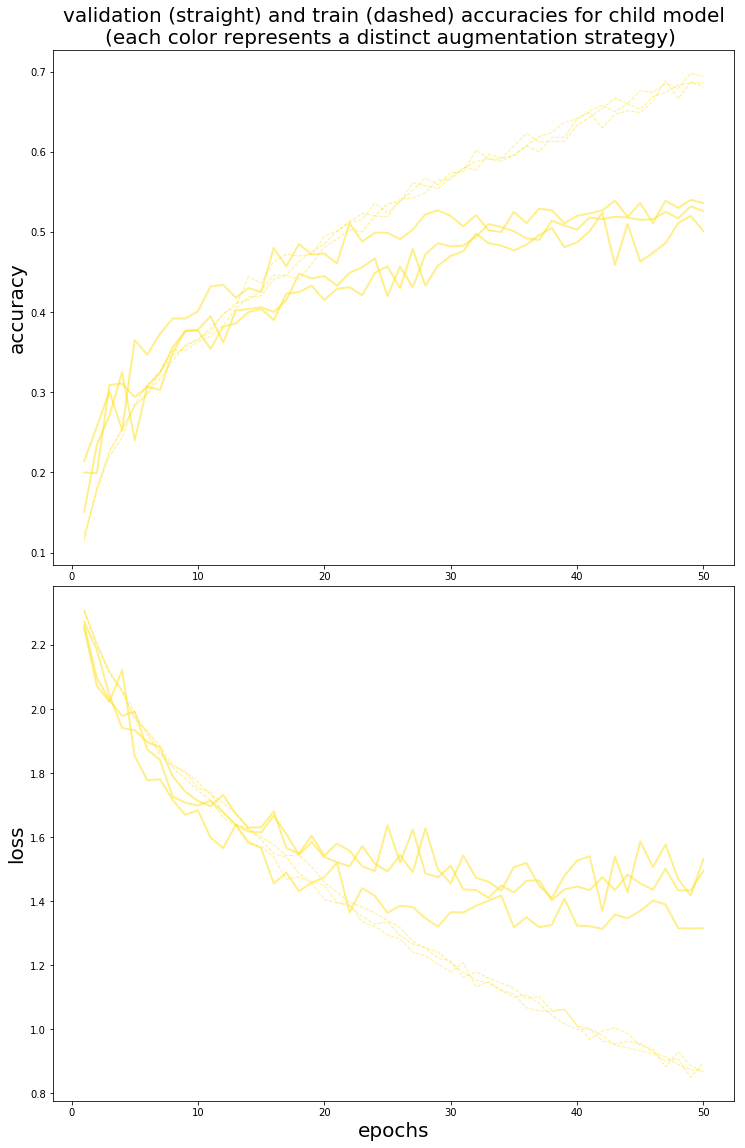

In [22]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[1:2]:
    print ("trial_no:",i)
    display_augmentation_by_steps(i, non_overfitting_exp_df, data, nrows=4)
    # display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=2, ncols=4)
    plt.figure(figsize=(2,2))
    plot_exp_lines(exp_df[exp_df["trial_no"]==i])

In [23]:
non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward",ascending=False)[:15]

,acc,loss,val_acc,val_loss,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,sample_no,reward,epoch,acc_overfit,total_acc_overfit
7200,0.111,2.316,0.113,2.298,49,dropout,0.198,invert,0.240,sharpen,0.409,0.465,1,0.550,0.0,-0.002,2.321
10650,0.123,2.306,0.214,2.253,72,emboss,0.980,sharpen,0.028,sharpen,0.154,0.472,1,0.520,0.0,-0.091,2.757
3000,0.120,2.305,0.123,2.221,21,gamma-contrast,0.797,dropout,0.236,translate-x,0.633,0.510,1,0.509,0.0,-0.003,0.020
8700,0.146,2.262,0.203,2.139,59,rotate,0.939,additive-gaussian-noise,0.001,gaussian-blur,0.561,0.492,1,0.503,0.0,-0.057,2.594
17700,0.113,2.306,0.189,2.258,119,translate-y,0.990,gamma-contrast,0.658,dropout,0.512,0.183,1,0.501,0.0,-0.076,0.528
11250,0.126,2.290,0.222,2.216,76,dropout,0.987,additive-gaussian-noise,0.100,translate-x,0.582,0.132,1,0.499,0.0,-0.096,6.444
900,0.137,2.268,0.197,2.198,7,gaussian-blur,0.970,coarse-dropout,0.171,translate-y,0.751,0.608,1,0.498,0.0,-0.060,1.148
4350,0.127,2.297,0.128,2.278,30,sharpen,0.946,clouds,0.284,additive-gaussian-noise,0.314,0.475,1,0.494,0.0,-0.001,8.171
19350,0.115,2.288,0.229,2.199,130,brighten,0.237,additive-gaussian-noise,0.193,crop,0.526,0.478,1,0.494,0.0,-0.114,2.901
2400,0.148,2.254,0.216,2.175,17,gaussian-blur,0.767,sharpen,0.675,shear,0.313,0.965,1,0.490,0.0,-0.068,4.754


# Top-3 nonoverfitting policies curves

,trial_no,aug1_type,aug1_magnitude,aug2_type,aug2_magnitude,aug3_type,aug3_magnitude,portion,reward
1,49,dropout,0.198,invert,0.240,sharpen,0.409,0.465,0.550
2,72,emboss,0.980,sharpen,0.028,sharpen,0.154,0.472,0.520
0,21,gamma-contrast,0.797,dropout,0.236,translate-x,0.633,0.510,0.509


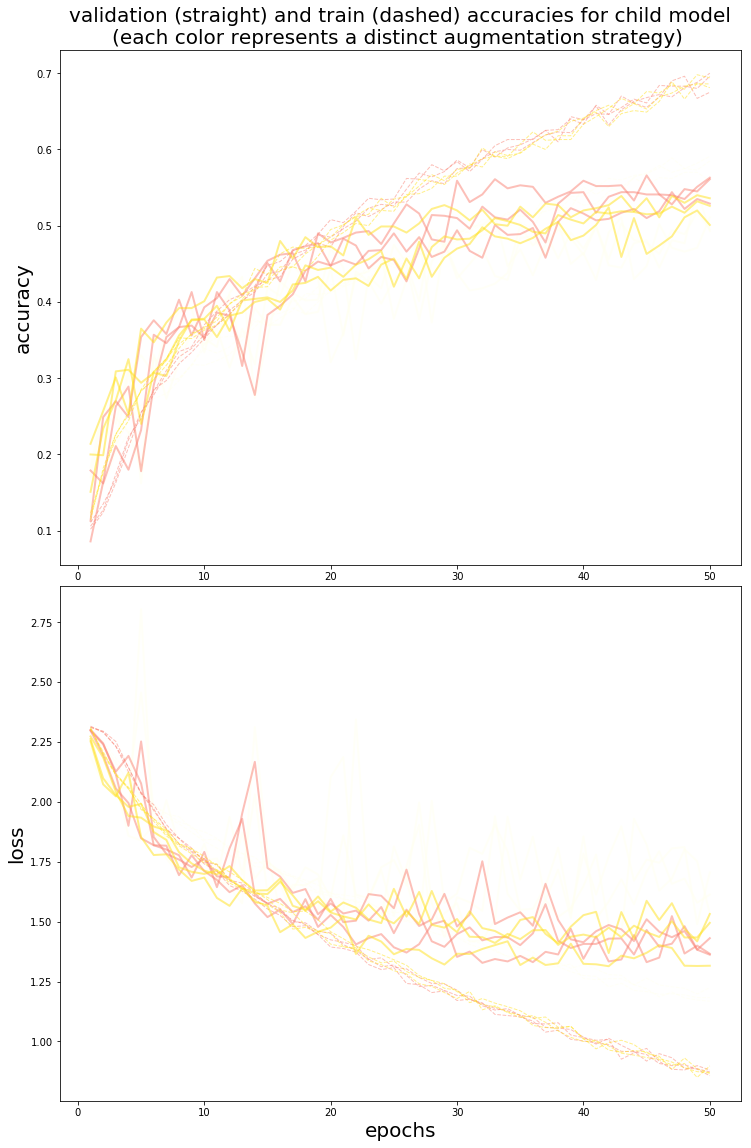

In [24]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])